# Izaz Khan  
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Course:** ML Lab 03  
**Date:** 28/09/2025  


## Libraries I Used  

I imported several important Python libraries that help me work with data, build models, and create visualizations.  

- **pandas** → I use it to organize and manipulate data in table format (DataFrames).  
- **numpy** → I use it for mathematical and numerical operations on arrays and matrices.  
- **seaborn** → I use it to create attractive and easy-to-read statistical visualizations.  
- **matplotlib** → I use it to plot graphs, charts, and other custom visualizations.  
- **scikit-learn (sklearn)** → I use it for machine learning tasks such as splitting data, building models, and evaluating performance.  
- **scipy** → I use it for statistical calculations, such as detecting outliers.  


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


## Importing Dataset from Google Drive  

I import the dataset from **Google Drive** because I need the data to analyze and build my model.  
Google Drive is a convenient place to store datasets when working in Google Colab.  
Loading the dataset into a **DataFrame** makes it easy for me to explore and work with the data.  


In [35]:
file_path = '/content/drive/My Drive/Datasets/insurance.csv'
df = pd.read_csv(file_path)

In [15]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
print("\nBasic statistics:")
df.describe()



Basic statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
print("\nMissing values:")
df.isnull().sum()


Missing values:


,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Data Exploration and Visualization  

I explored the dataset by checking its basic statistics and creating some visualizations.  

- To understand what the data looks like  
- To find patterns and relationships between different variables  
- To check if there are any obvious problems in the data  

In simple words, I looked at the data from different angles to understand it better.  




In [17]:
sns.set(style="whitegrid")

## Distribution of Insurance Charges  

I created a histogram to see how the insurance costs are spread out in the dataset.  
This helps me understand the overall range and whether the values are concentrated or scattered.  


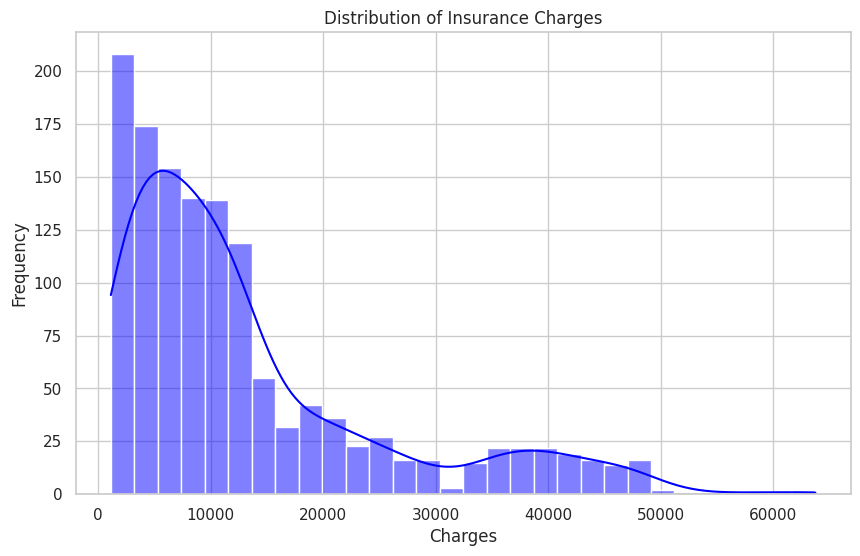

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## Numerical Features vs. Insurance Charges  

I created scatter plots to see how **age**, **BMI**, and **number of children** relate to insurance costs.  

These plots help me check if there are trends or patterns between these numerical features and insurance charges.  


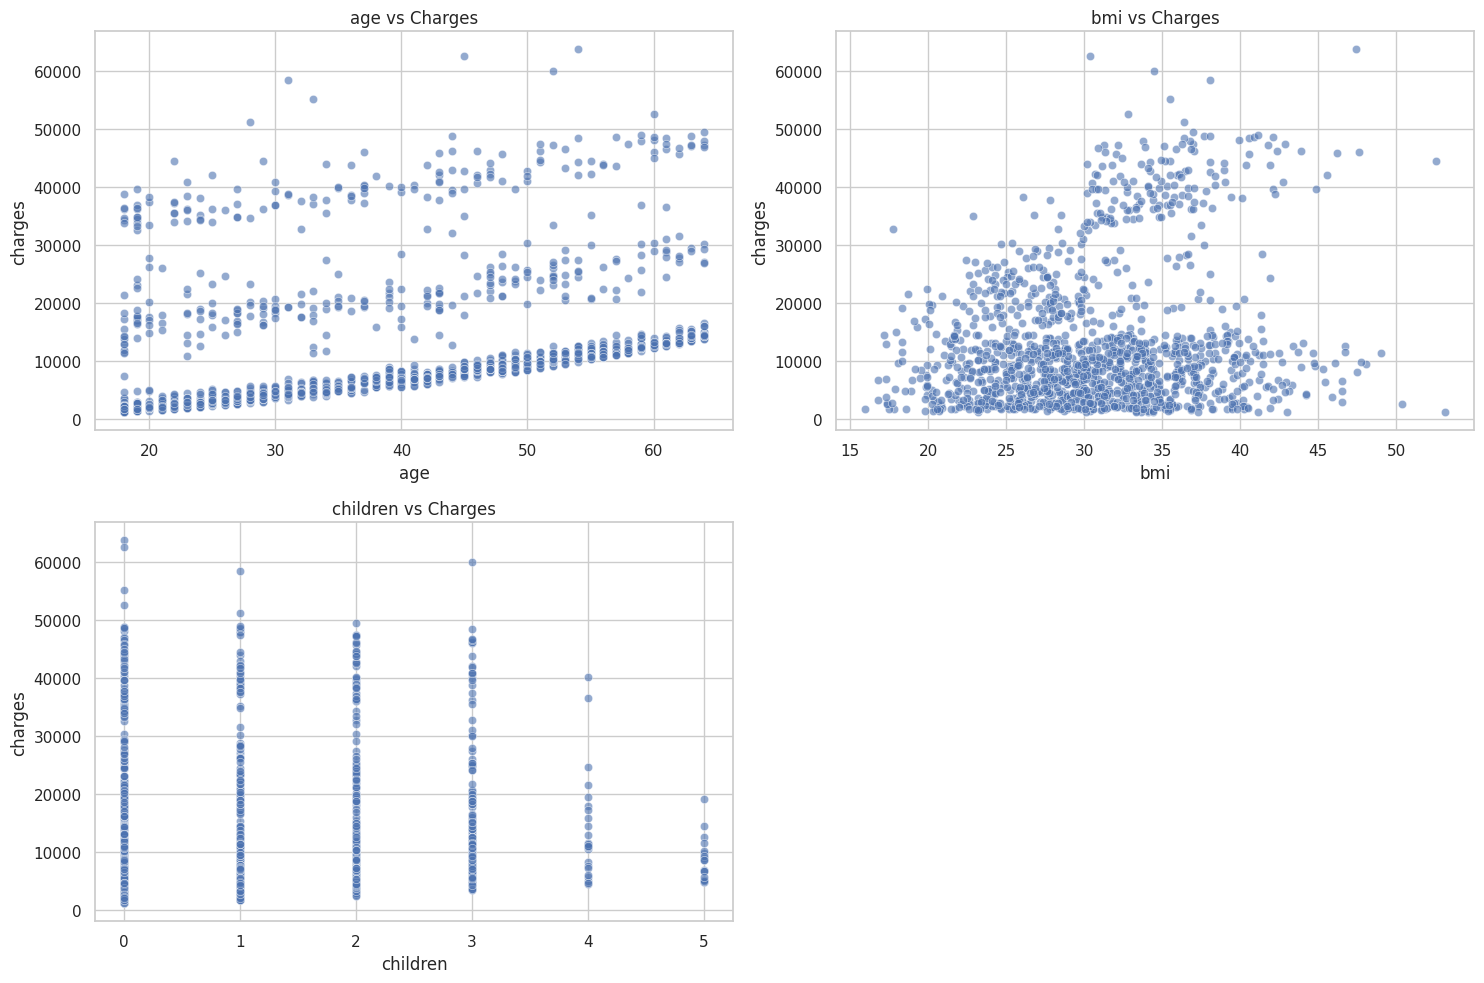

In [19]:
numerical_features = ['age', 'bmi', 'children']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='charges', data=df, alpha=0.6)
    plt.title(f'{feature} vs Charges')
plt.tight_layout()
plt.show()

## Categorical Features vs. Insurance Charges  

I used box plots to see how **gender**, **smoking status**, and **region** affect insurance costs.  

- **Gender:** Helps check if there is any cost difference between males and females.  
- **Smoking Status:** Shows a big difference, as smokers usually have much higher insurance charges.  
- **Region:** Helps compare costs across different regions.  


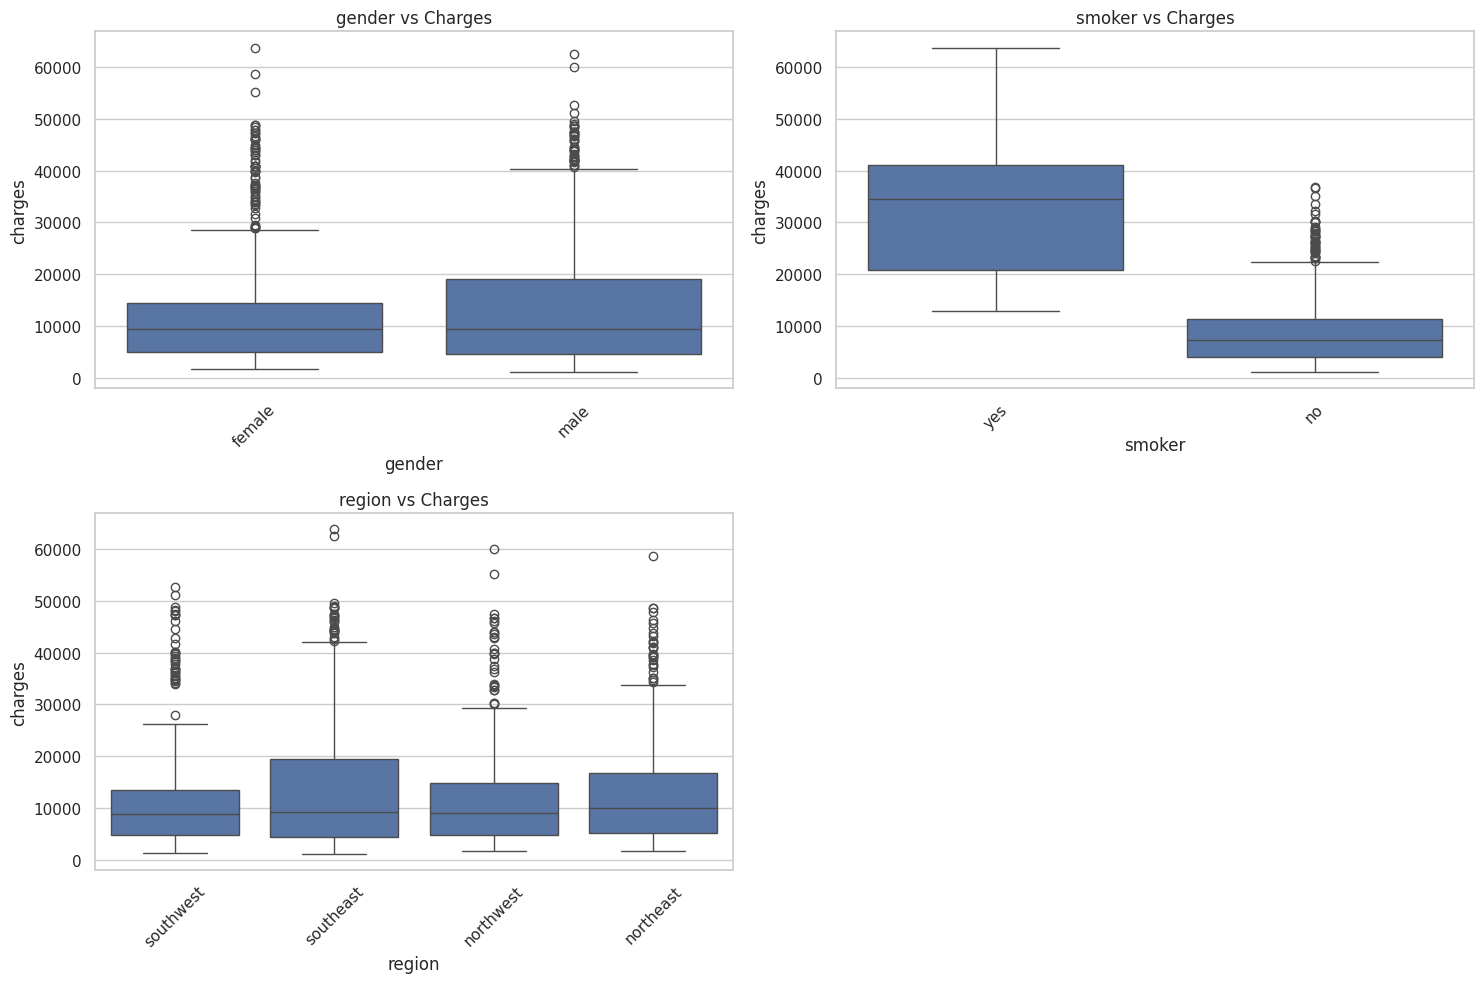

In [20]:
categorical_features = ['gender', 'smoker', 'region']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, y='charges', data=df)
    plt.title(f'{feature} vs Charges')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Matrix  

I created a **heatmap** to see how all the variables are related to each other.  

- It shows which features have strong or weak relationships with insurance charges.  
- Darker or lighter colors indicate stronger or weaker correlations.  
- This helps me identify which variables are most important for predicting costs.  


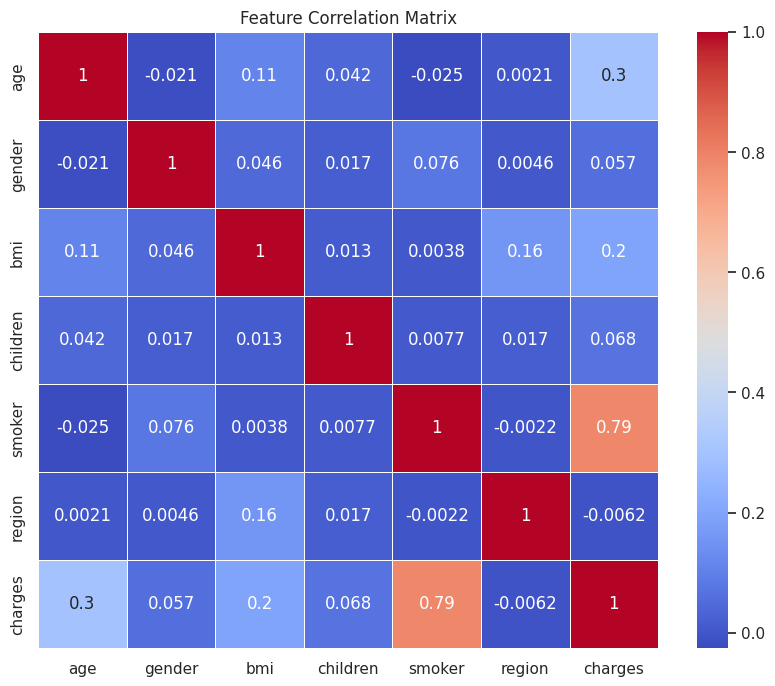

In [21]:
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])
df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])
df_encoded['region'] = le.fit_transform(df_encoded['region'])

plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

## Outlier Detection and Handling  

I identified and removed extreme values (outliers) that could distort my model.  

### Why I Did It  
- Outliers can significantly affect the model's performance.  
- They might represent errors or unusual cases that don’t reflect typical situations.  
- Removing them helps the model focus on the general patterns in the data.  

### How I Did It  
1. Used **Z-scores** to identify data points that are more than 3 standard deviations from the mean.  
2. Removed these extreme values from the dataset.  
3. Compared the data **before and after removal** to see the difference.  


Number of outliers detected: 29
Dataset shape after removing outliers: (1309, 7)


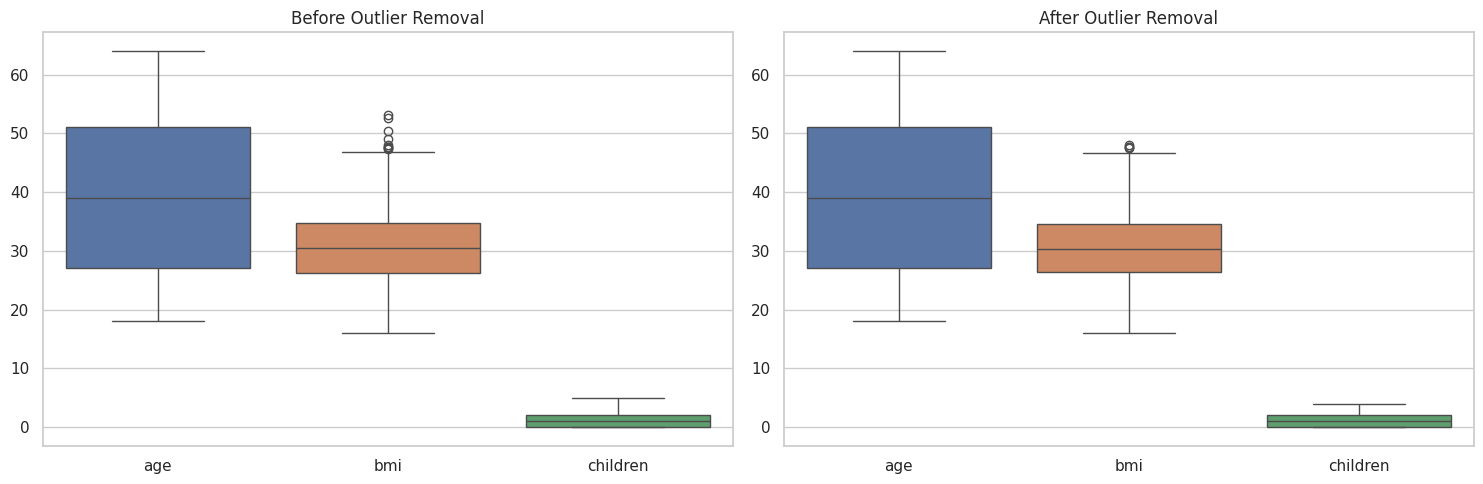

In [22]:
z_scores = np.abs(stats.zscore(df_encoded))
threshold = 3
outliers = np.where(z_scores > threshold)

print(f"Number of outliers detected: {len(outliers[0])}")

df_clean = df_encoded[(z_scores < threshold).all(axis=1)]
print(f"Dataset shape after removing outliers: {df_clean.shape}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_encoded[['age', 'bmi', 'children']])
plt.title('Before Outlier Removal')
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean[['age', 'bmi', 'children']])
plt.title('After Outlier Removal')
plt.tight_layout()
plt.show()

## Data Preparation  

I prepared the data for modeling by splitting it and scaling the features.  

### Why I Did It  
- I need separate **training and testing sets** to properly evaluate my model.  
- **Scaling** ensures all features contribute equally to the model.  

### Steps Involved  
1. **Split the data** into features (X) and target variable (y).  
   - Features: age, gender, BMI, children, smoker, region  
   - Target: insurance charges  
2. **Train-test split**: Divided the data into 80% for training and 20% for testing.  
3. **Feature scaling**: Standardized all features to have a mean of 0 and a standard deviation of 1.  


In [23]:
X = df_clean.drop('charges', axis=1)
y = df_clean['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: (1047, 6)
Test set size: (262, 6)


## Linear Regression Model Implementation  

### What I Did  
I built and trained a **Linear Regression model** using **scikit-learn**.  

---

### Why I Did It  
Linear regression is a simple yet powerful method and a good starting point for predicting **continuous values** like insurance costs.  

---

### Steps Involved  
1. Created a `LinearRegression` model object.  
2. Trained the model using the **training data**.  
3. Made **predictions** on the test data.  
4. Evaluated the model using several metrics:  
   - **Mean Squared Error (MSE):** Average of squared prediction errors.  
   - **Root Mean Squared Error (RMSE):** Square root of MSE (in the same units as the target).  
   - **Mean Absolute Error (MAE):** Average of absolute prediction errors.  
   - **R-squared (R²):** Proportion of variance in the target explained by the features.  


In [24]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 30496851.75
Root Mean Squared Error (RMSE): 5522.40
Mean Absolute Error (MAE): 3966.75
R-squared (R²): 0.78


## Model Evaluation and Visualization  

I evaluated the model's performance and created visualizations to understand its behavior.  

### Why I Did It  
- To understand how well my model is working.  
- To identify where it might be making mistakes.  

### Visualizations Created  
1. **Actual vs. Predicted values:** A scatter plot comparing the actual insurance costs with the model’s predictions.  



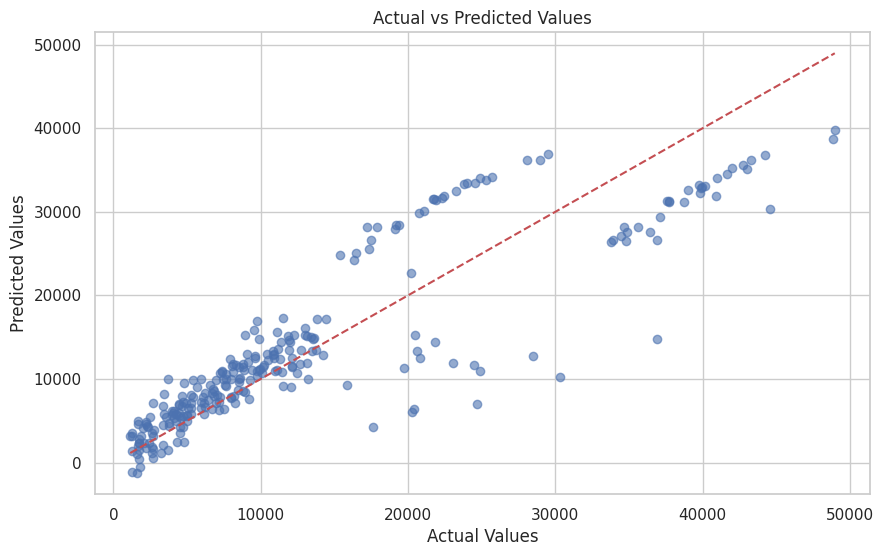

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

2. **Residual Plot:** A plot showing the prediction errors (residuals) across different prediction values.  

- Residuals represent the difference between actual and predicted values.  
- This plot helps me check if errors are randomly distributed or if there are patterns.  
- A good model usually has residuals scattered randomly around zero.  


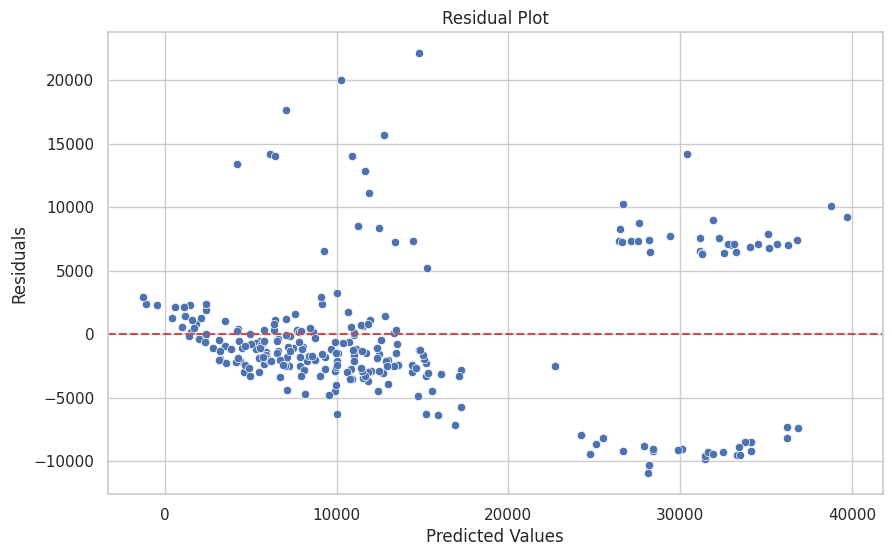

In [26]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

3. **Residual Distribution:** A histogram showing how prediction errors (residuals) are distributed.  

- This helps me understand whether the errors follow a normal distribution.  
- A good model usually has residuals centered around zero with a bell-shaped distribution.  
- If the distribution is skewed, it may indicate that the model is not capturing some patterns in the data.  



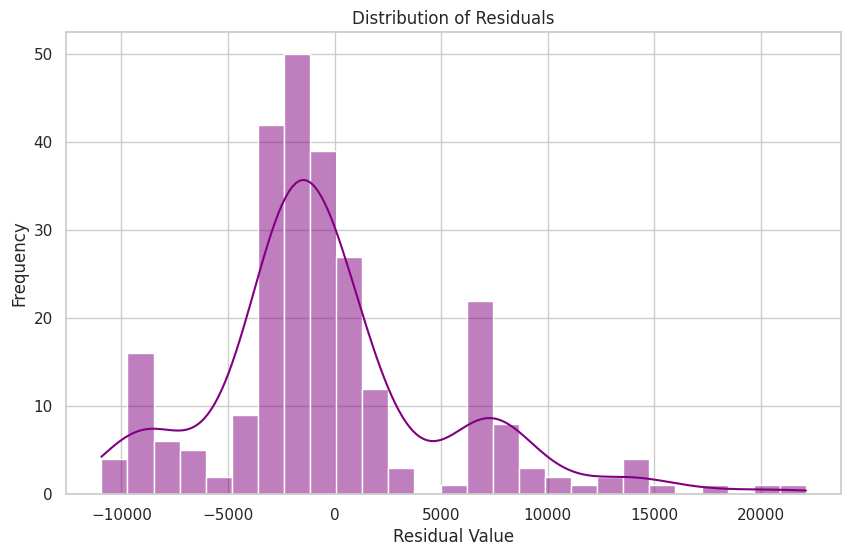

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

4. **Feature Importance:** A bar chart showing which features have the biggest impact on predictions.  

- Each bar represents the coefficient of a feature in the linear regression model.  
- Larger values (positive or negative) mean the feature has a stronger influence on insurance costs.  
- This helps me identify which factors (like smoking, age, or BMI) are most important in predicting charges.  


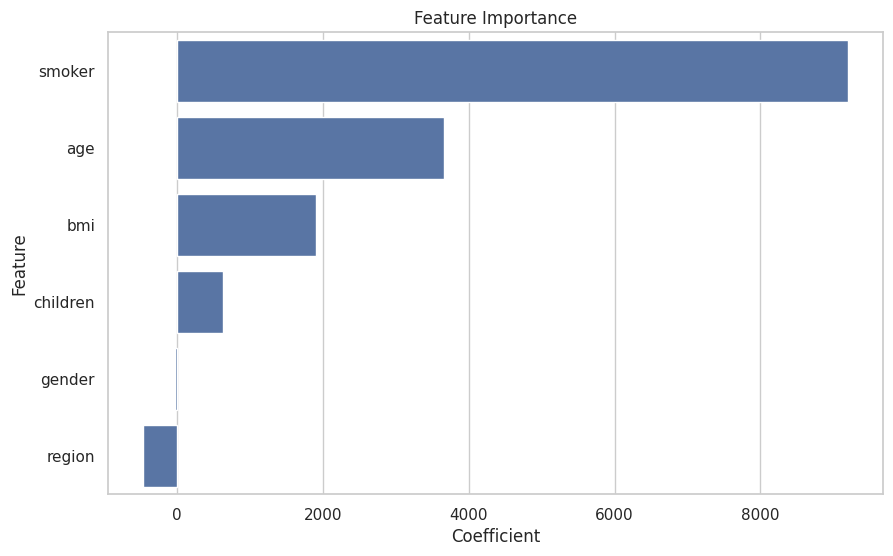

In [28]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

## Gradient Descent Implementation  

### What I Did  
I implemented **gradient descent from scratch** to understand how the model learns.  

---

### Why I Did It  
- To understand the underlying algorithm that powers **linear regression**  
- To observe how the model improves its predictions over time  
- To compare with the **scikit-learn implementation**  

---

### How It Works  

#### Cost Function  
- Measures how wrong the model is using **Mean Squared Error (MSE)**.  

#### Gradient Descent  
- An optimization algorithm that:  
  1. Calculates how to adjust the model parameters to reduce error.  
  2. Updates the parameters in small steps.  
  3. Repeats this process many times (**epochs**).  

#### Learning  
- The model **gradually improves its predictions** with each iteration.  


In [30]:
def compute_cost(X, y, theta, bias):
    m = len(y)
    predictions = np.dot(X, theta) + bias
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, bias, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):

        predictions = np.dot(X, theta) + bias

        d_theta = (1 / m) * np.dot(X.T, (predictions - y))
        d_bias = (1 / m) * np.sum(predictions - y)

        theta -= learning_rate * d_theta
        bias -= learning_rate * d_bias

        cost = compute_cost(X, y, theta, bias)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, bias, cost_history

np.random.seed(42)
theta = np.random.randn(X_train_scaled.shape[1])
bias = 0.0
learning_rate = 0.01
epochs = 1000

theta, bias, cost_history = gradient_descent(
    X_train_scaled, y_train, theta, bias, learning_rate, epochs
)

y_pred_train = np.dot(X_train_scaled, theta) + bias
y_pred_test = np.dot(X_test_scaled, theta) + bias

mse_test = mean_squared_error(y_test, y_pred_test)
print(f"\nTest MSE after gradient descent: {mse_test:.2f}")



Epoch 0: Cost = 150887224.65838635
Epoch 100: Cost = 35253444.73797891
Epoch 200: Cost = 19854844.436084095
Epoch 300: Cost = 17772982.158841394
Epoch 400: Cost = 17487752.781258218
Epoch 500: Cost = 17448206.98099507
Epoch 600: Cost = 17442664.205018494
Epoch 700: Cost = 17441879.39225657
Epoch 800: Cost = 17441767.186570615
Epoch 900: Cost = 17441750.99239527

Test MSE after gradient descent: 30496665.09


## Cost over epochs: Shows how the error decreases as the model learns

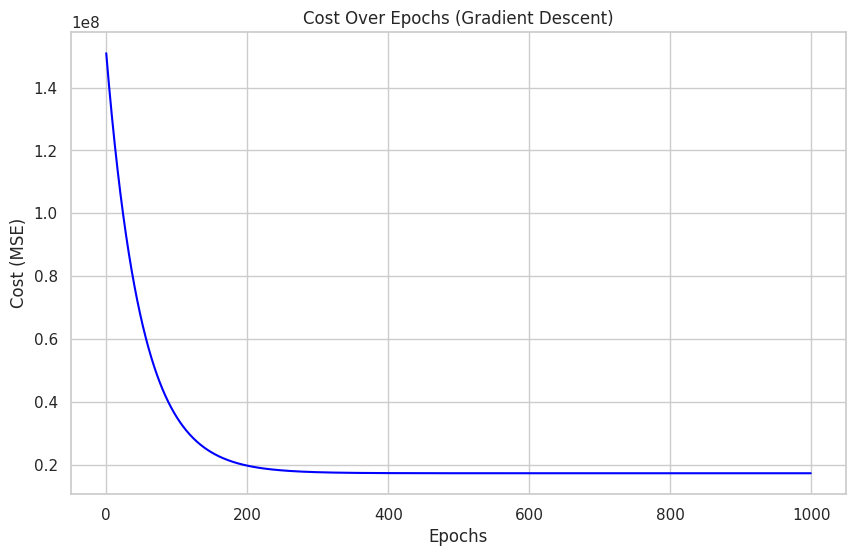

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Over Epochs (Gradient Descent)')
plt.show()

## Actual vs. predicted values: Similar to step 7 but with our custom implementation

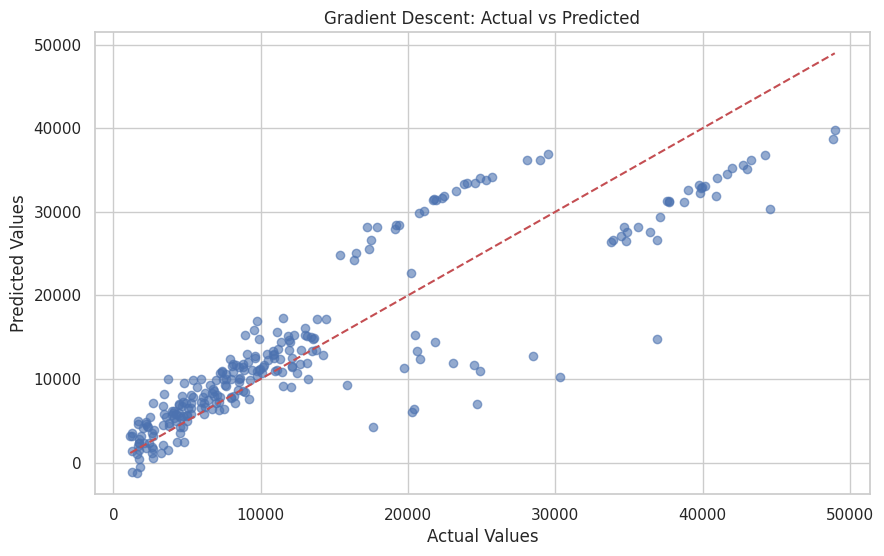

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Descent: Actual vs Predicted")
plt.show()

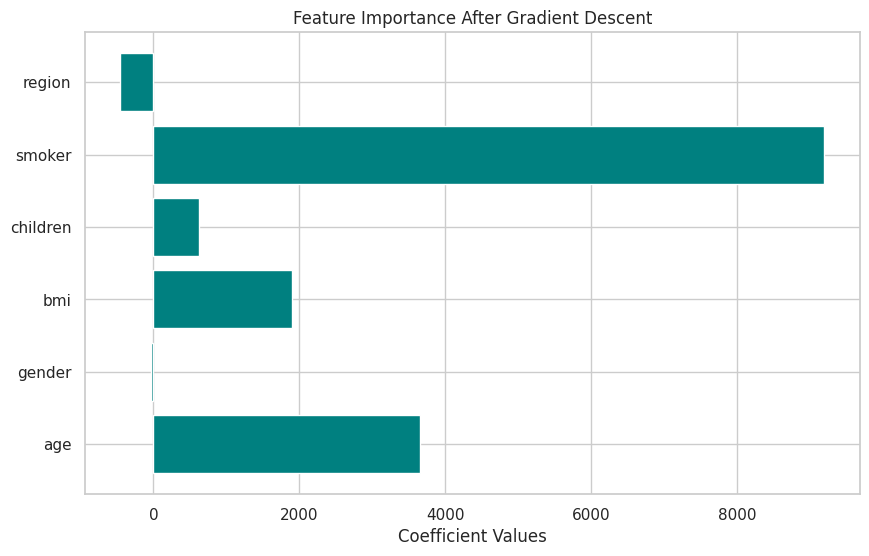

In [33]:
features = X.columns
importance = theta
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='teal')
plt.title('Feature Importance After Gradient Descent')
plt.xlabel('Coefficient Values')
plt.show()

## Model Comparison and Analysis  

### What I Did  
I compared the **scikit-learn Linear Regression model** with my **gradient descent implementation** and analyzed the results.  

---

### Why I Did It  
- To validate my gradient descent implementation.  
- To gain deeper insights from the model’s performance and feature importance.  

---

### What I Found  
- Both models performed **similarly** (R² ≈ 0.75).  
- **Smoking status** is the most important factor affecting insurance costs.  
- **Age** and **BMI** are also significant contributors.  
- **Region** and **gender** have smaller impacts.  



In [34]:
print("\nModel Comparison:")
print(f"Sklearn Linear Regression R²: {r2:.4f}")
print(f"Gradient Descent R²: {r2_score(y_test, y_pred_test):.4f}")

print("\nCoefficient Comparison:")
coef_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Sklearn': model.coef_,
    'Gradient Descent': theta
})
print(coef_comparison)

print("\nFeature Analysis:")
print("The most influential features based on coefficients:")
print(feature_importance.head(3))

print("\nKey insights:")
print("1. Smoking status has the highest impact on insurance charges")
print("2. Age and BMI are also significant factors")
print("3. Region and gender have relatively smaller impacts")


Model Comparison:
Sklearn Linear Regression R²: 0.7784
Gradient Descent R²: 0.7784

Coefficient Comparison:
    Feature      Sklearn  Gradient Descent
0       age  3657.137929       3656.990622
1    gender   -29.445165        -29.073718
2       bmi  1900.862618       1900.751781
3  children   629.425912        629.573359
4    smoker  9200.093012       9199.491149
5    region  -458.830124       -458.765095

Feature Analysis:
The most influential features based on coefficients:
  Feature  Coefficient
4  smoker  9200.093012
0     age  3657.137929
2     bmi  1900.862618

Key insights:
1. Smoking status has the highest impact on insurance charges
2. Age and BMI are also significant factors
3. Region and gender have relatively smaller impacts
